<div class="custom-container">

# COMM475
# Investment Policies: Tactical Asset Allocation
## Instructor: Lorenzo Garlappi
## TAs: 
#### Martin Rinaldi
#### Tina Tian

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

# Outline

## 1. Subcategories of Dynamic Asset Allocation

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

![DAA: Subcategories](TeachingNotes_Lorenzo.png)

<div class="custom-container">

## 2. The Basic ''Contrarian'' TAA Principle as Applied to TAA

* Mean reversion in stock prices (negative return correlation)

## 3. TAA Models

* The General Methodology of Estimating the Equity Risk Premium (ERP)

* Fama, French (FF) Predictive Model

* Chen Predictive Model

## 4. Practical TAA Measures

* How to Estimate ERP directly

* A Simple TAA Implementation

## 5. Summary 

* The ERP is hard to predict

* The ERP is related to the business cycle

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Warm up 

Before we start, let's first install the dependencies and import the libraries we need.

Please follow steps 1 and 2 below to be able to run this notebook on your local machine.

   1. Install Dependencies: Run ```pip install -r requirements.txt``` in the terminal to install all required packages.
   2. Run the setup cell bellow.
   
</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [1]:
# Setup environment
from config import *

<div class="custom-container">

# 1. TAA: Definitions of SAA, TAA and IAA

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

### TAA: William Sharpe's characterization of SAA, TAA and IAA 

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

After a market move:

> For TAA: Go back to point A
>> Adjust **expectations** about asset returns

> For SAA: Rebalance to SAA weights in point B
>> Adjust portfolio **weights**

> For IAA: Go back to point C
>>Update **preferences** (e.g., risk tolerance) as a result of change in wealth

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Assume two possible investments:
- Bonds with $E[r_{B}]$  and $\sigma_{B}$
- Stocks with $E[r_{S}]$  and $\sigma_{S}$
- Covariance between bonds and stock: $\sigma_{BS}$

The investor chooses $X_{st}$ as the proportion invested in stock at date $t$, with $1-X_{st}$ invested in bonds, to maximize the investor's expected utility, with a **relative risk tolerance** ($RRT[W_{t}]$), which depends upon the investor's wealth, $W_{t}$ at date $t$. 

$RRT[W_{t}]$ increases with $W_{t}$: as wealth goes up, an investor gets more aggressive, i.e., is willing to take more risk.

The portfolio choice problem for the investor:
$$\max_{X_{st}} E[R_{t}] -  \frac{1}{2RRT[W_{t}]} V[R_{t}]$$

where $E[R_{t}] = X_{st} \cdot E[r_{S}] + (1-X_{st}) \cdot E[r_{B}]$, and $V[R_{t}] = X_{st}^{2}\sigma_{S}^{2} + (1-X_{st})^{2}\sigma_{B}^{2} + 2X_{st}(1-X_{st})\sigma_{BS}$

Take first order condition on $X_{st}$:

$$E[r_{S}] - E[r_{B}] -\frac{1}{2RRT[W_{t}]}\Big(2X_{st}\sigma_{S}^{2} + 2(1-X_{st})\sigma_{B}^{2} - 4X_{st}(1-X_{st})\sigma_{BS} + 2\sigma_{BS} - 2\sigma_{B}^{2}\Big) = 0$$

The solution takes the following form:

$$X_{st}=K_{0}+K_{1t} \cdot RRT[W_{t}]$$

Where $K_{0}$ and $K_{1t}$ are constants given by

\begin{align*}
 K_{0}&=\frac{\sigma_{B}^2-\sigma_{BS}}{\sigma_{B}^2+\sigma_{S}^2-2\sigma_{BS}}\\
  K_{1t}&=\frac{E_{t} [r_{S}]-E[r_{B}]}{\sigma_{B}^2+\sigma_{S}^2-2\sigma_{BS}}
\end{align*}

**SAA Investing**:

$K_{0}$, $K_{1t}$ and $RRT[W_{t}]$ are all taken as constant and unchanging over time under SAA. This assumes:
> (i) no changes in risk assessments ($\sigma_{B},\sigma_{S},\sigma_{BS}$)

> (ii) no changes in expected stock returns $E_{t}[r_{S}]=E[r_{S}]$ is independent of $t$, i.e., it is a long-run expectation

> (iii) no change in $RRT[W_{t}]$ because SAA assumes the investor doesn’t worry about short-run changes in wealth.

With these three assumptions, SAA is thus assuming that $X_{st}$ is the same at each date $t$. The Mean-Variance Efficient Frontier (MVEF) does not move, and the optimal point on that curve (determined by the investor's $RRT[W_{t}]$) does not move.

**TAA Investing**:

We continue to assume (in all three DAA styles) that there are no changes in risk assessments ($\sigma_{B},\sigma_{S},\sigma_{BS}$). BUT, with TAA, the investor alters their $E_{t}[r_{S}]$ at each date $t$, as the investor alters the belief about upcoming stock expected returns. For simplicity, we assume $E[r_{B}]$ does not change. Thus, $K_{1t}$ changes at each date $t$ so that $X_{st}$ changes at each date $t$. As $E_{t}[r_{S}]-E[r_{B}]$ increases, so does $X_{st}$. Because expected returns change, the MVEF changes, but the $RRT[W_{t}]$ is assumed to stay constant in TAA. So, the TAA investor will change their portfolio weighting each period as their outlook for the stock market changes each period.

**IAA Investing**:

In IAA investing, $RRT[W_{t}]$ changes at each date as the investor's wealth changes: when $W_{t}$ gets bigger, risk tolerance also increases ($RRT$ increases) as the investor is more aggressive when she is wealthier. Thus, $X_{st}$ changes at each date as $RRT$ changes: higher wealth means a bigger $RRT$ which means a bigger $X_{st}$. The MVEF does not move, but the $RRT$ point on the curve does, so $X_{st}$ moves.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

### The following functions calculate K0, K1 and stock weight from assets volatility and returns.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [2]:
# calculate K0
def K0(sigma_b,sigma_s,corr):
  K0 = (sigma_s*sigma_s - corr*sigma_b*sigma_s)/(sigma_b*sigma_b + sigma_s*sigma_s - 2*corr*sigma_b*sigma_s)
  return K0

# calculate K1
def K1(rb,rs,sigma_b,sigma_s,corr):
  K1 = (rs-rb)/(sigma_b*sigma_b + sigma_s*sigma_s - 2*corr*sigma_b*sigma_s)
  return K1

# calculate stock weight
def stock_weight(rb,rs,sigma_b,sigma_s,corr,RRT):
  denom = sigma_b**2 + sigma_s**2 - 2*corr*sigma_b*sigma_s
  sigma_bs = corr*sigma_b*sigma_s
  K0 = (sigma_b**2 - sigma_bs)/denom
  K1 = (rs - rb)/denom
  return K0+RRT*K1

In [3]:
# Example
rb = 0.03
rs = 0.05
sigma_b = 0.2
sigma_s = 0.30
corr = 0.1
RRT = 1/3

print("K0 is:", np.round(K0(sigma_b,sigma_s,corr),3))
print("K1 is:", np.round(K1(rb,rs,sigma_b,sigma_s,corr),3))

print(r"The stock weight X[st] chosen by the investor is:", np.round(stock_weight(rb, rs, sigma_b, sigma_s, corr, RRT), 3))


K0 is: 0.712
K1 is: 0.169
The stock weight X[st] chosen by the investor is: 0.345


<div class="custom-container">

### Suppose that the investor becomes more risk tolerant as his/her wealth increases. What happens to the portfolio weight in stocks, $X_{st}$?


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

### TAA: Mean Reversion in the Stock Index Price Level (Negative Serial Correlation in Stock Index Returns)

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The basic hypothesis of contrarian TAA investing is that the stock index price level fluctuates around its long-term trend line, overshooting too high, reverting back, and then overshooting too low and reverting back, etc. The graph on the next page (mean-reverting stock index) illustrates this viewpoint.

* When the index is too low:

> $E[r_{S}]$ is <u>greater than</u> the long-term trend line. The simple theory: investors are poor (the stock index is low, so stock wealth is small) and so they demand a higher $E[r_{S}]$ before being willing to invest in risky stocks.



* When the index is too high:

> $E[r_{s}]$ is <u>less than</u> the long-term trend line (although it should never be less than the riskless rate). The simple theory: investors are rich (the stock index is high, so stock market wealth is large) and so they are willing, even at a low $E[r_{S}]$, to invest in risky stocks.


In this contrarian TAA model, the stock index price level reverts back to its long-run trend line when it deviates too far from that trend line. 


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

### TAA: A Mean-Reverting Stock Index


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Assume investors perceive the stock index behaving as shown below. We see it mean-reverting around a growth trend. At times of a high stock index level, investors are rich and they are willing to accept a lower expected return to bear the risk of the stock market. At a low stock index level, investors are poor and demand a high expected growth rate in order for them to bear risk.


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

![TAA: A Mean-Reverting Stock Index](Mean_Reversion.png)

<div class="custom-container">

Thus, as investors' attitude towards bearing risk changes, the “market price of risk / risk premium” ($\lambda$ in the CAPM) changes. $\lambda$ is positively related to the expected return on the stock market, $E[r_{S}]$.

* When price gets too high, it reverts back to the long-term trend, but usually over-shoots and goes too low.
* When price is low, $E[r_{S}]$ is high, and vice-versa.

A contrarian investor may take market risk as constant. Then as expected market return varies (low price means high $E[r_{S}]$ and high price means low $E[r_{S}]$, the reward-to-risk ratio of investing in the market varies. The contrarian investor invests when price is low, so the reward-to-risk ratio is high.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

# 2. TAA: The General TAA Methodology

## Determining $𝑬_{𝒕}[𝒓_{𝑺}]$

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The TAA manager must identify predictor variables, which are economic (or behavioral) variables that can be observed at regular intervals (e.g., monthly) that the manager believes predict future asset returns. That is:

**Predictor variables forecast $E_{t} [r_{S}]$** (and/or other asset class expectations). The TAA process has two steps:

**TAA Step 1**. Find predictor variables and determine their relationship to $E_{t} [r_{S}]$

Finding predictor variables that are correlated with future stock returns is usually done with regression analysis, by regressing stock returns on predictor variables that are observable before the stock return occurs:


$$r_{sq} = a + b_{1}PV_{1q} + b_{2}PV_{2q} + e$$


Where:

- $PV_{1q}$ and $PV_{2q}$ are the observations of the predictor variables at **the start** of quarter $q$
- $r_{sq}$ is the stock index return over quarter $q$

When a relationship is found, stock returns are predicted from the regression model:

$$E[r_{sq}] = a' + b_{1}'PV_{1q} + b_{2}'PV_{2q}$$


Where:
- $E[r_{sq}]$ is the prediction made for the upcoming quarter $q$
- $a'$, $b_{1}'$ and $b_{2}'$ are the coefficients from the regression above based on historical data
- $PV_{1q}$ and $PV_{2q}$ are the current (at the start of quarter $q$) observations of the predictor variables

**TAA Step 2**. Convert the $E_{t}[r_{S}]$ estimate to a stock/bond allocation in your TAA portfolio

Once the stock return is estimated, it must be converted to a TAA allocation (i.e., how much in stock and how much in other asset classes?). This is achieved by mean-variance analysis.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

# 3. TAA: The Fama-French (FF) Predictive Model

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

# 

<div class="custom-container">

In this section, we report the original analysis from Fama-French predictive model and then followed with python code to reproduce the results.


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

We think of TAA as arising because the TAA investor believes in a time-varying equity risk premium (ERP). For example, in the CAPM, we say the “market price of risk” ($𝐸RP =𝐸[𝑟_{𝑚}]−𝑟_{𝑓})$ is a constant. But, in TAA, we assume that the compensation investors want for bearing stock market risk (this is the “market price of risk”) varies through time.

FF describe a consumption smoothing story about a time-varying equity risk premium (ERP).
* At an economic peak, investors' income is higher than their desired consumption, so all investors seek investments: this drives prices of risky assets up and expected returns down.
* At an economic trough, investors' income is less than their desired consumption, so they must liquidate their investments to consume; this drives prices of risky assets down and expected returns up. This links expected returns (like the ERP) to the economic cycle: high expected returns at economic troughs and low expected returns at economic peaks.

Most simply: ERP varies inversely with price: low price <=> high ERP (and vice-versa).

FF use three predictor variables:

* **DP = dividend yield on all NYSE stocks = Dividend/Price**

> Since dividends on all stocks are fairly constant, DP is inversely related to the index price level.
So, low prices => high DP => high expected returns.

* **DEF = AllLTYld - AaaLTYld**
> the yield on a portfolio of 100 (government (riskless) and corporate (risky)) long-term maturity bonds - the yield on a portfolio of long-term low-risk (Aaa rated) bonds.

> Since there is default risk in the AllLTYld but none in the AaaLTYld, DEF is the default (or credit) spread. Low prices for risky bonds means high risky bond yields, which means a high DEF. But, low junk bond prices mean high expected returns on junk bonds (and, it is hypothesized, on stock returns as well).

> So, high DEF => high expected returns.

* **TERM = AaaLTYld - TBillYld**
> the yield on a long-term riskless bond portfolio minus the yield on a short-term riskless bond portfolio.

> This is called the "term spread" and represents the slope of the yield curve. Empirically, a steep yield curve (a high TERM) occurs at economic troughs; expected returns are higher at economic troughs. And, at economic peaks, the yield curve is flat or sometimes even inverted; economic peaks feature low expected returns.

> Thus, high TERM => high expected returns.

An important aspect of the FF study is that they investigate if the predictor model predicts subsequent (a) monthly returns, or (b) quarterly returns or (c) annual returns or (d) 4-year returns. This helps us confirm whether the contrarian TAA hypothesis of long-term mean reversion in stock index returns applies.

FF look at predicting the returns on 4 asset classes:
* Aaa = long-term riskless bonds
* LG = long-term, low-grade, i.e., risky bonds
* VW = a value-weighted stock portfolio, i.e., a big-cap stock portfolio
* EW = an equally-weighted stock portfolio, i.e., a small-cap stock portfolio.

Thus, FF investigates if the three predictor variables, DP, DEF and TERM, have any predictive power in forecasting the future returns on 4 asset classes: Aaa, LG, VW and EW. These four asset classes have very different return profiles, so we would expect different levels of predictive acuracies among the predictor variables.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## TAA: Fama-French Results

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Now we load historical data and take a look at patterns of FF risk factors. First we load packages that we need for our analysis.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Here we load data. The data includes Fama-French risk factors, factors for Chen predictive models, and asset returns

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [4]:
riskfactors = pd.read_csv('riskfactors_V2.csv', index_col='date', parse_dates=True)

<div class="custom-container">

We now take a look at the data structure.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [5]:
riskfactors.head(2)

,dp,term,def,ypl,tb30,CRSP_SPvwx,realgnpg,mktrf,Rfree,AAA,BAA,vwretx,ewretx,corpr
date,,,,,,,,,,,,,,
1941-02-28,6.821573,2.74,4.636888,NaN,0.0004,-0.012570,NaN,-0.013640,-0.0001,0.0278,0.0442,-0.038958,-0.013340,0.0006
1941-03-31,6.827309,2.69,4.474293,NaN,0.0011,0.004173,NaN,0.003978,0.0001,0.0280,0.0438,-0.013024,-0.027249,-0.0022


In [6]:
###########################################
###An overview of variables in the dataset
###########################################

#! dp: Dividend price ratio on NYSE stock index (source: Goyal's website)
#! def: default yield spread: yield of BAA - AAA bond yield (source: Goyal's website)
#! term: term spread: AAA yield - 30day treasury bill (source: Goyal's website & Fama-Frenc(1989))
#! ypl: annual growth in industrial production (source: FRED)
#! tb30: 30day treasury bill yield (source: Goyal's website)
#! CRSP_SPvwx: SP500 value weighted index return (source: Goyal's website)
#! realgnpg: quarterly real GNP growth (source: FRED)
#! mktrf: market premium (source: Goyal's website)
#! Rfree: risk free rate (source: Goyal's website)
#! AAA: AAA bond yield (source: Goyal's website)
#! BBB: BBB bond yield (source: Goyal's website)
#! vwretx: value weighted return of all stocks (source: WRDS)
#! ewretx: equal weighted return of all stocks (source: WRDS)
#! corpr: corporate bond returns (source: Goyal's website)

# Goyal's website: https://sites.google.com/view/agoyal145/?redirpath=/

list(riskfactors)

['dp',
 'term',
 'def',
 'ypl',
 'tb30',
 'CRSP_SPvwx',
 'realgnpg',
 'mktrf',
 'Rfree',
 'AAA',
 'BAA',
 'vwretx',
 'ewretx',
 'corpr']

<div class="custom-container">

As a sanity check, let's take a look at the dividend-price ratio over time.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

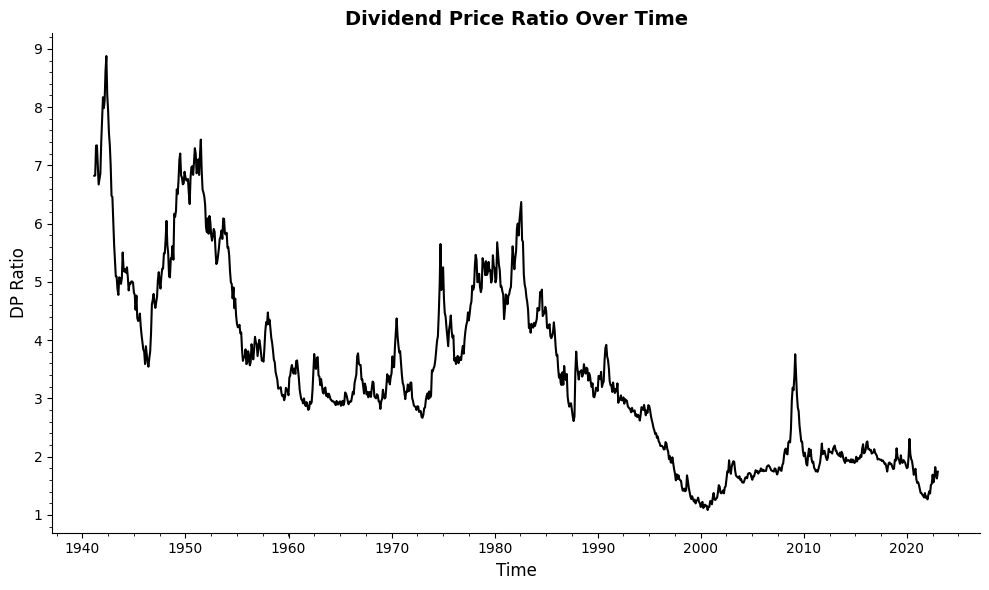

In [7]:
# Check how the dp ratio looks like over time
plt.figure(figsize=(10, 6))   
plt.plot(riskfactors['dp'], color='black', linewidth=1.5)  

plt.title('Dividend Price Ratio Over Time', fontsize=14, fontweight='bold')   
plt.xlabel('Time', fontsize=12)   
plt.ylabel('DP Ratio', fontsize=12)   

plt.grid(False)   
plt.minorticks_on()  

# Remove the top and right spines to reduce visual clutter
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust tick parameters for a cleaner look
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelsize=10)

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()  # Display the plot

<div class="custom-container">

We plot the FF risk factors to take a look at their distribution.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

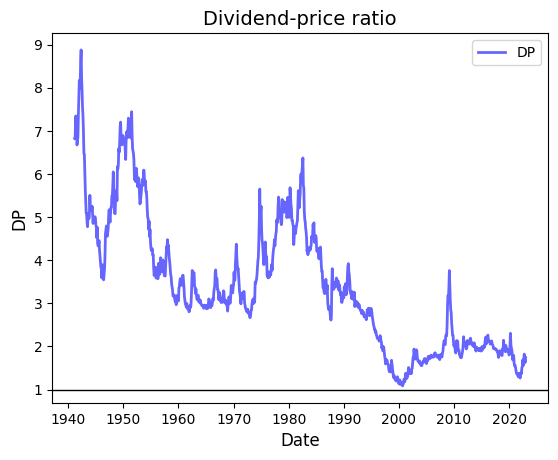

In [8]:
# Plot DP
fig, ax = plt.subplots()
ax.plot(riskfactors.index, riskfactors.dp, 'b-', linewidth=2, label='DP', alpha=0.6)
ax.legend()
ax.set_title("Dividend-price ratio", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("DP", fontsize=12)
ax.grid(False)
# Format the dates on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Reference line at y=1
ax.axhline(y=1, color='black', linewidth=1)
# Plot a maximum of 10 ticks on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(10))
plt.show()

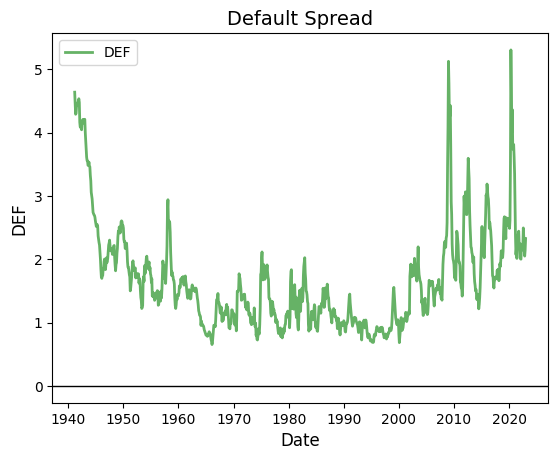

In [10]:
# Plot DEF
fig, ax = plt.subplots()
ax.plot(riskfactors.index, riskfactors['def'], 'g-', linewidth=2, label='DEF', alpha=0.6)
ax.legend()
ax.set_title("Default Spread", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("DEF", fontsize=12)
ax.grid(False)
# Format the dates on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Reference line at y=0
ax.axhline(0, color='black', linewidth=1)
# Plot a maximum of 10 ticks on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(10))
plt.show()

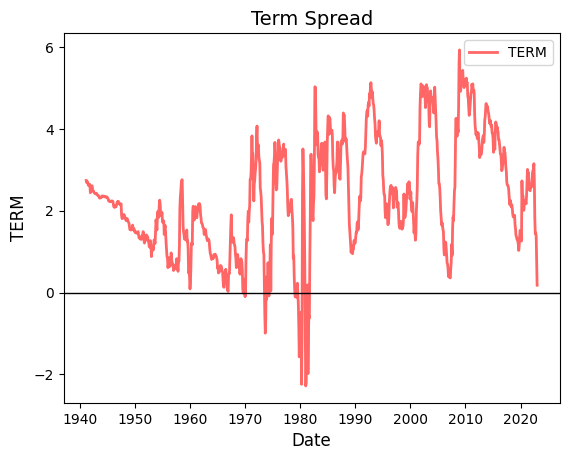

In [11]:
# Plot TERM
fig, ax = plt.subplots()
ax.plot(riskfactors.index, riskfactors['term'], 'r-', linewidth=2, label='TERM', alpha=0.6)
ax.legend()
ax.set_title("Term Spread", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("TERM", fontsize=12)
ax.grid(False)
# Format the dates on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Reference line at y=0
ax.axhline(0, color='black', lw=1)
# Plot a maximum of 10 ticks on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(10))
plt.show()

<div class="custom-container">

Now we use the data to understand the Fama French multi-risk factor results and asset return prediction.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 1

**DP and DEF are persistent, TERM is not.**

* Both DP and DEF are *autocorrelated with lags*. This means that $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +1})>0$, but so is $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +2})>0$, and so is $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +3})>0$, etc., out to 8 annual lags. 
  
* Same with DEF. This means that when DP or DEF are above/below their means, they tend to stay there for quite a while.

* TERM has positive autocorrelation, but only out to 2 annual lags.
* Another interpretation: DP and DEF have long frequencies, TERM has a short frequency.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Now we simulate the results using data. We firstly select the sample period to 1941 - 1987 (1941 is the year that the data sample starts, 1987 is the end year of Fama French paper)

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [5]:
# Below we filter the risk factors to the period of interest
start_period = '1941'
end_period = '1987'
riskfactors_filtered = riskfactors[start_period:end_period]

<div class="custom-container">

Now we print the autocorrelation for DP, DEF, and TERM to look at the persistence of these risk factors.

Moreover, we are going to use this occasion to learn how to define a Python function to calculate the autocorrelation. When you define a function, you can use it multiple times without having to write the same code over and over again :) 

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [13]:
#  Autocorrelation function 
def autocorr(series, lags, title):
    correlations = [
        [f"{title}t, {title}t+{i}", round(series.corr(series.shift(-i*12), method='spearman'), 2)]
        for i in range(1, lags + 1)
    ]
    print(tabulate(correlations, headers=['Lag', 'Correlation'], tablefmt='fancy_grid'))

# DP autocorrelation for future periods
print("DP is highly persistent")
autocorr(riskfactors_filtered['dp'], 4, 'DP')

# DEF autocorrelation for future periods
print("DEF is persistent")
autocorr(riskfactors_filtered['def'], 4, 'DEF')

# TERM autocorrelation for future periods
print("TERM is less persistent")
autocorr(riskfactors_filtered['term'], 4, 'TERM')

DP is highly persistent
╒════════════╤═══════════════╕
│ Lag        │   Correlation │
╞════════════╪═══════════════╡
│ DPt, DPt+1 │          0.8  │
├────────────┼───────────────┤
│ DPt, DPt+2 │          0.65 │
├────────────┼───────────────┤
│ DPt, DPt+3 │          0.59 │
├────────────┼───────────────┤
│ DPt, DPt+4 │          0.51 │
╘════════════╧═══════════════╛
DEF is persistent
╒══════════════╤═══════════════╕
│ Lag          │   Correlation │
╞══════════════╪═══════════════╡
│ DEFt, DEFt+1 │          0.67 │
├──────────────┼───────────────┤
│ DEFt, DEFt+2 │          0.54 │
├──────────────┼───────────────┤
│ DEFt, DEFt+3 │          0.51 │
├──────────────┼───────────────┤
│ DEFt, DEFt+4 │          0.61 │
╘══════════════╧═══════════════╛
TERM is less persistent
╒════════════════╤═══════════════╕
│ Lag            │   Correlation │
╞════════════════╪═══════════════╡
│ TERMt, TERMt+1 │          0.52 │
├────────────────┼───────────────┤
│ TERMt, TERMt+2 │          0.18 │
├────────────────┼──

<div class="custom-container">

Next we move to Result 2 to understand how Fama French Risk Factors move with Business Cycles.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 2

After 1951, TERM is higher at the trough of a business cycle compared to its levels at both the preceding peak and the subsequent peak of the business cycle.

* While TERM has lower autocorrelation than DP or DEF, it is typically steep at business cycle troughs and flat (or inverted) at business cycle peaks.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The code below plots the risk factors and business cycles. 

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

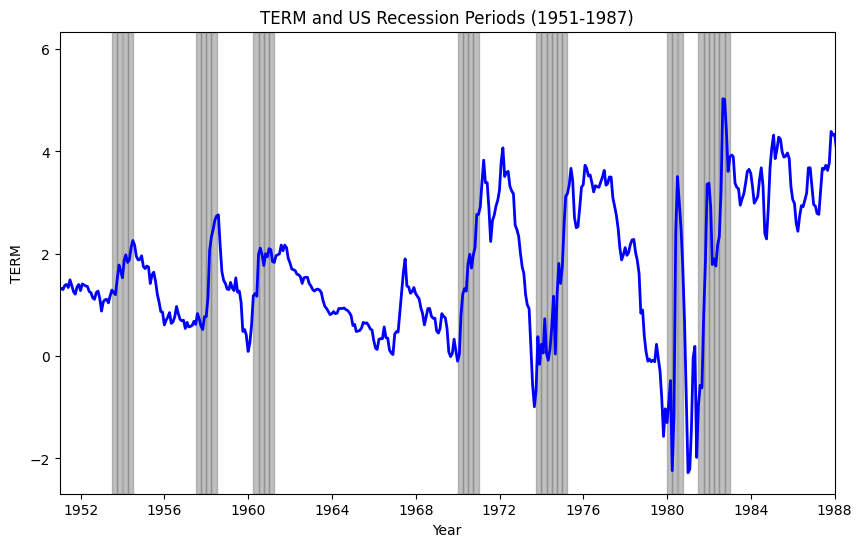

In [14]:
# Define start and end period
start_period = 1941
end_period = 2023

# Read and prepare US recession data
csv_usrec = 'https://raw.githubusercontent.com/lorenzogarlappi/COMM475/main/Data/usrec_quarterly.csv'
rec_data = pd.read_csv(csv_usrec)

# Correct date conversion approach
rec_data['date'] = pd.to_datetime(rec_data['year'].astype(int).astype(str) + 
                                  ((rec_data['quarter'].astype(int) - 1) * 3 + 1).astype(str), 
                                  format='%Y%m')

# Filter rec_data within the specified period
rec_data_filtered = rec_data[(rec_data['date'].dt.year >= start_period) & (rec_data['date'].dt.year <= end_period)]

# Plot TERM over time, highlighting US recession periods
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(riskfactors.index, riskfactors['term'], label='TERM', color='blue', linewidth=2)

# Shading for recession periods
for start_date in rec_data_filtered[rec_data_filtered['usrec'] == 1]['date']:
    end_date = start_date + pd.offsets.MonthEnd(3)
    ax.axvspan(start_date, end_date, color='gray', alpha=0.5)

ax.set_xlim([pd.to_datetime('1951-01-01'), pd.to_datetime('1988-01-01')])
ax.set_title("TERM and US Recession Periods (1951-1987)")
ax.set_xlabel("Year")
ax.set_ylabel("TERM")

plt.show()

<div class="custom-container">

Now we move to Result 3 to understand the correlation among FF risk factors.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 3

Correlations:
* $Corr(𝐷P_{𝑡} ,𝐷EF_{𝑡})=0.75$: DP and DEF move together over time. 

**Obs.**: Our results below show a weaker correlation, probably because our DP calculation differs from that in FF (1989). We don't weight dividends by market cap in the numerator, a method they use. To replicate their approach accurately, we'd need to pinpoint dividend-paying firms and assess their market cap at dividend announcement, a notably cumbersome task.

* $Corr(𝐷P_{𝑡} ,TERM_{𝑡})=0.16$, and $Corr(𝐷EF_{𝑡} ,TERM_{𝑡})=0.18$. 

  - TERM behaves differently than DP and DEF.

  - DP and DEF have similar characteristics overtime, but TERM is quite different from DP and DEF.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The code below plots DP, TERM, and DEF. The graph shows that TERM is much more volatile than DP and DEF.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

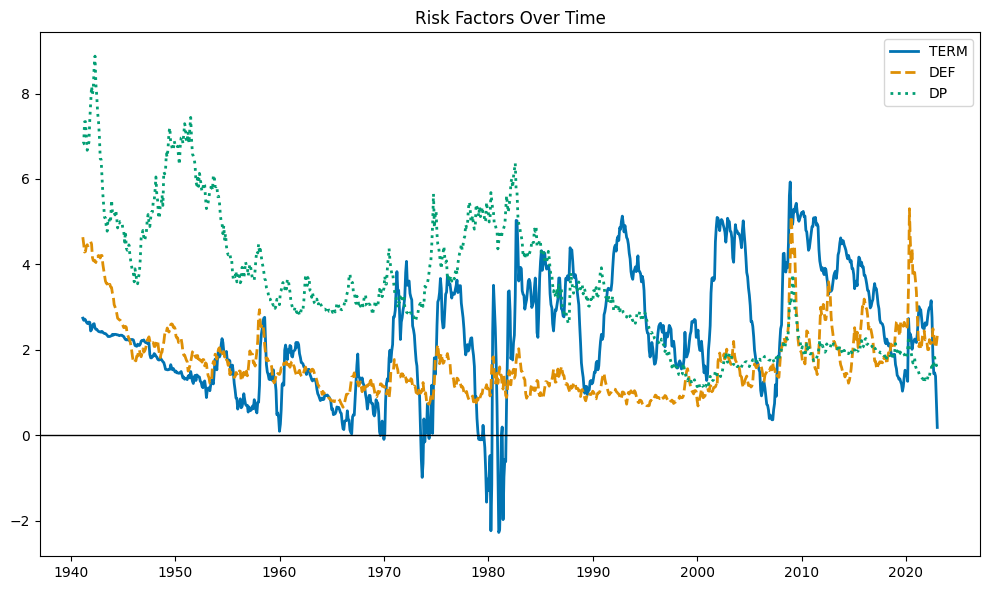

In [16]:
dates = riskfactors.index
dp = riskfactors['dp']   
term = riskfactors['term']
default = riskfactors['def']   

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dates, term, color='#0173B2', linestyle='-', label='TERM', lw=2)
ax.plot(dates, default, color='#DE8F05', linestyle='--', label='DEF', lw=2)
ax.plot(dates, dp, color='#029E73', linestyle=':', label='DP', lw=2)

# Add reference line at zero
ax.axhline(0, color='black', linewidth=1)

# Configurations
ax.set_title('Risk Factors Over Time')
ax.legend()

plt.tight_layout()
plt.show()

<div class="custom-container">

Now let's check the correlation between the risk factors decade-by-decade. 

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [23]:
# Setup the decades
decades = ['40s', '50s', '60s', '70s', '80s', '90s', '2000s', '2010s', '2020s', '41-87']
time_ranges = {
    '40s': ('1941-01-01', '1949-12-31'),
    '50s': ('1950-01-01', '1959-12-31'),
    '60s': ('1960-01-01', '1969-12-31'),
    '70s': ('1970-01-01', '1979-12-31'),
    '80s': ('1980-01-01', '1989-12-31'),
    '90s': ('1990-01-01', '1999-12-31'),
    '2000s': ('2000-01-01', '2009-12-31'),
    '2010s': ('2010-01-01', '2019-12-31'),
    '2020s': ('2020-01-01', '2023-12-31'),
    '41-87': ('1941-01-01', '1987-12-31')
}

# Prepare the data structure for correlations
correlations = {
    "DP and DEF": [],
    "DP and TERM": [],
    "DEF and TERM": []
}

# Calculate correlations for each decade
for decade, (start, end) in time_ranges.items():
    segment = riskfactors.loc[start:end]
    correlations["DP and DEF"].append(segment['dp'].corr(segment['def']))
    correlations["DP and TERM"].append(segment['dp'].corr(segment['term']))
    correlations["DEF and TERM"].append(segment['def'].corr(segment['term']))

# Convert correlations to a format suitable for tabulation
correlations_for_table = []
for pair, values in correlations.items():
    row = [pair] + values
    correlations_for_table.append(row)

# Print the table with decades as columns
headers = ["Factor Pair"] + decades
print(tabulate(correlations_for_table, headers=headers, tablefmt="grid", floatfmt=".2f"))


+---------------+-------+-------+-------+-------+-------+-------+---------+---------+---------+---------+
| Factor Pair   |   40s |   50s |   60s |   70s |   80s |   90s |   2000s |   2010s |   2020s |   41-87 |
+===============+=======+=======+=======+=======+=======+=======+=========+=========+=========+=========+
| DP and DEF    |  0.69 |  0.29 |  0.45 | -0.23 |  0.32 |  0.05 |    0.92 |    0.55 |    0.66 |    0.61 |
+---------------+-------+-------+-------+-------+-------+-------+---------+---------+---------+---------+
| DP and TERM   |  0.11 |  0.21 | -0.01 | -0.37 | -0.19 |  0.43 |    0.37 |    0.14 |   -0.41 |    0.06 |
+---------------+-------+-------+-------+-------+-------+-------+---------+---------+---------+---------+
| DEF and TERM  |  0.68 |  0.46 |  0.70 |  0.59 |  0.12 | -0.01 |    0.47 |   -0.27 |   -0.07 |    0.24 |
+---------------+-------+-------+-------+-------+-------+-------+---------+---------+---------+---------+


<div class="custom-container">

Next we move to Result 4 to study the predictability of Fama French risk factors on asset returns.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 4

In their analysis, Fama and French regress asset class returns (Aaa, LG, VW, and EW) against predictor variables (DP, DEF, and TERM), observing:

- Most b and c regression coefficients are positive, aligning with expectations.
- For risky assets (LG, VW, and EW), with increasing return horizons, DP and DEF exhibit rising t-stats, whereas TERM's t-stats diminish, indicating reduced predictive power over longer horizons.

The model can be expressed as:

$$
r_i - r_f = \alpha + \beta_1 \cdot PV_{1} + \beta_2 \cdot PV_{2} + \epsilon
$$

- $r_i$: the return of asset $i$
- $r_f$: the risk-free rate. We use the 1-month Treasury bill rate as a proxy for the risk-free rate.
- $alpha$: the intercept. If the model is good at capturing systematic risk, we should not be able to reject $\hat{\alpha}=0$.
- $PV_{1}, PV_{2}$: predictors.
- $\beta_1, \beta_2$: coefficients we want to estimate. 
- $\epsilon$: the error term, capturing the variation in excess returns not explained by the predictive variables. 

Due to the high correlation observed between $dp$ (dividend price ratio) and $def$ (default spread) during the period 1941-1987, a direct multivariate regression including both as predictors might lead to multicollinearity, obscuring the interpretation of their individual effects on asset returns. To deal with this, Fama and French propose separate regressions:

1. **First Specification**:

   $$
   r_i - r_f = \alpha + \beta_1 \cdot dp + \beta_2 \cdot term + \epsilon
   $$

   This specification includes $dp$ and $term$, excluding $def$.

2. **Second Specification**:

   $$
   r_i - r_f = \alpha + \beta_1 \cdot def + \beta_2 \cdot term + \epsilon
   $$

   In contrast, this model incorporates $def$ and $term$, omitting $dp$.


**Conclusions**: 

- DP and DEF emerge as stronger predictors of risky asset returns over longer horizons, while TERM's predictive ability wanes. This finding corroborates Result 1, highlighting DP and DEF's persistence and "long cycles", suggesting their effectiveness in forecasting longer-term returns. 
- A high DP today implies a higher likelihood of above-average returns over the next four years (t-stat of 5.26, surpassing the conventional significance threshold of 1.96).


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Now we will take a stab at replicating FF(1989). In the code below, X represent the set of risk factors, and Y represents asset returns.

Due to the absence of differentiated risk class data for corporate returns, we use `corpr`, a composite portfolio of long-term corporate bonds (both high and low-grade), as our proxy. Additionally, we use value-weighted and equally-weighted stock returns in the LHS, constructed from CRSP data (detailed in the Appendix code).

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>


In [6]:
# Filter to match the sample period in Fama-French 1989
riskfactors_filtered = riskfactors['1941':'1987']
X = riskfactors_filtered[['dp', 'term']]
assets = {
    'Corp': (riskfactors_filtered['corpr']-riskfactors_filtered['tb30'])*12,
    'VW': (riskfactors_filtered['vwretx']-riskfactors_filtered['tb30'])*12,
    'EW': (riskfactors_filtered['ewretx']-riskfactors_filtered['tb30'])*12,
}
predictors = ['dp', 'term']  # Specify your predictors here

# Define periods for non-overlapping observations
periods = {'M': 1, 'Q': 3, 'Y': 12, '4Y': 48}

def predictive_regression(X: pd.DataFrame, Y: pd.Series, predictors: list, periods: dict):
    """
    Run predictive regressions and return a DataFrame containing regression results including R^2.

    Args:
        X (pd.DataFrame): DataFrame containing predictor variables.
        Y (pd.Series): Series containing the outcome variable.
        predictors (list): List of predictor column names to include in the regression.
        periods (dict): Dictionary specifying the periods for regression.

    Returns:
        pd.DataFrame: DataFrame containing regression results with R^2 for each model and predictive horizon.
    """
    results = []
    X_lagged = X[predictors].shift(1)  # Lagging predictors by one period for predictability

    for period_name, shift in periods.items():
        # Prepare Y based on the period
        Y_shifted = Y.shift(-shift)
        if period_name != 'M':
            Y_shifted = Y.rolling(window=shift).sum().shift(-shift)
        
        data = pd.concat([X_lagged, Y_shifted], axis=1).dropna()
        X_aligned, Y_aligned = data[predictors], data.iloc[:, -1]

        model = sm.OLS(Y_aligned, sm.add_constant(X_aligned)).fit(cov_type='HAC', cov_kwds={'maxlags':12})
        
        for predictor in predictors:
            results.append({
                'Interval': period_name,
                'Asset': Y.name,
                'Predictor': predictor,
                'Coefficient': round(model.params[predictor], 2),
                'T-Stat': round(model.tvalues[predictor], 2),
                'R^2': round(model.rsquared, 2)
            })
            
    return pd.DataFrame(results)

# Execute the predictive regression for each asset and compile the results
summary_results = pd.DataFrame()
for asset_name, Y in assets.items():
    Y.name = asset_name  # Set the name property for identification
    results = predictive_regression(X, Y, predictors, periods)
    summary_results = pd.concat([summary_results, results], ignore_index=True)

# Display the results DataFrame in a readable format
display(summary_results)

,Interval,Asset,Predictor,Coefficient,T-Stat,R^2
0,M,Corp,dp,0.07,2.32,0.08
1,M,Corp,term,0.08,1.55,0.08
2,Q,Corp,dp,0.20,2.23,0.10
3,Q,Corp,term,0.24,1.53,0.10
4,Y,Corp,dp,0.76,2.07,0.10
5,Y,Corp,term,0.85,1.35,0.10
6,4Y,Corp,dp,3.45,2.53,0.09
7,4Y,Corp,term,1.46,0.59,0.09
8,M,VW,dp,0.10,2.94,0.07
9,M,VW,term,0.09,1.73,0.07


<div class="custom-container">

- Results show that DP is a better predictor than TERM for corporate bond returns.

- Next we look at the predictive power of risk factors DEF and TERM on asset returns.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>


In [130]:
X = riskfactors_filtered[['def', 'term']]
predictors = ['def', 'term']  # Note that we did a great effort to define the function predictive_regression to be flexible. Now you can easily change the predictors: in this case we swap dp with def. 

summary_results_def = pd.DataFrame()
for asset_name, Y in assets.items():
    Y.name = asset_name
    results_def = predictive_regression(X, Y, predictors, periods)
    summary_results_def = pd.concat([summary_results_def, results_def], ignore_index=True)

display(summary_results_def)

,Interval,Asset,Predictor,Coefficient,T-Stat,R^2
0,M,Corp,def,0.28,5.95,0.25
1,M,Corp,term,0.04,0.90,0.25
2,Q,Corp,def,0.83,5.91,0.31
3,Q,Corp,term,0.12,0.85,0.31
4,Y,Corp,def,3.34,6.05,0.35
5,Y,Corp,term,0.32,0.61,0.35
6,4Y,Corp,def,14.62,6.09,0.43
7,4Y,Corp,term,-1.88,-0.90,0.43
8,M,VW,def,0.34,4.39,0.18
9,M,VW,term,0.05,1.01,0.18


<div class="custom-container">

The regression results indicate that DEF could predict asset returns better than TERM for bond returns.

The prediction results together in this section indicate that DP and DEF are better predictors of bond returns than TERM.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Next we further study the prediction of FF risk factors on asset returns for longer periods.

Result 5, Result 6 and Result 7 need longer-horizon data.
Given that the data we used is on quarterly basis, we did not reproduce those results in python here. But these results could be generated with the sample code.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 5

* At 1-year and 4-year horizons: the DP and DEF coefficients increase when moving from LG to VW to EW, that is, as the risk of the asset class increases. TERM coefficients are not sensitive to the risk of the asset class. In our data, we have a portfolio of long-term corporate bond returns (corpr) that mixes high-grade and low-grade bonds. We will use this as a proxy to test the FF1989 results.

* Recall that from the exercises above replicating Result 4, we can recover the coefficient estimators and T-statistics. Below we will used them to create a visual representation of FF(1989) Result 5. 

**Conclusion from Result 5**:

DP and DEF are better predictors for riskier assets; TERM's power to predict does not depend on the asset's risk.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

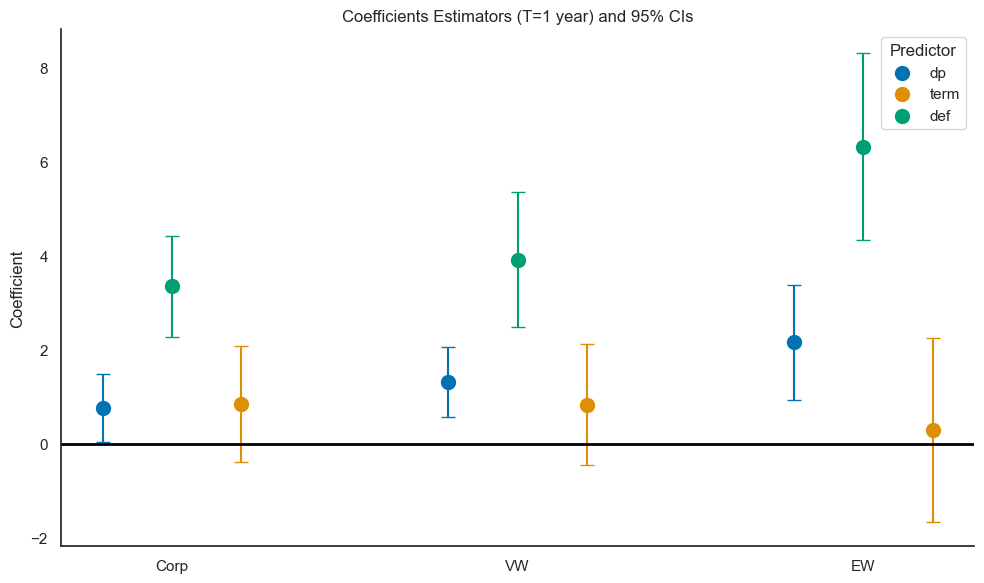

In [105]:
# Convert 'Coefficient' and 'T-Stat' columns from object to float for calculations
summary_results['Coefficient'] = summary_results['Coefficient'].astype(float)
summary_results['T-Stat'] = summary_results['T-Stat'].astype(float)
summary_results_def['Coefficient'] = summary_results_def['Coefficient'].astype(float)
summary_results_def['T-Stat'] = summary_results_def['T-Stat'].astype(float)

# Combine the two DataFrames
combined_results = pd.concat([summary_results, summary_results_def])

# Filter for yearly data
yearly_data = combined_results[combined_results['Interval'] == 'Y']

# Calculate the CI
yearly_data['CI'] = 1.96 * yearly_data['Coefficient'] / yearly_data['T-Stat']

# Eliminate duplicate entries of 'term' predictor. Keep only the first. 
yearly_data = yearly_data.drop_duplicates(subset=['Asset', 'Predictor'], keep='first')
# Setting up the plot
sns.set(style="white", palette="colorblind")
fig, ax = plt.subplots(figsize=(10, 6))

# Create a point plot with non-overlapping points for each predictor within each asset
# Adjust the position based on the predictor to avoid overlap
predictors = yearly_data['Predictor'].unique()
assets = yearly_data['Asset'].unique()
asset_positions = {asset: i for i, asset in enumerate(assets)}
predictor_offsets = {'dp': -0.2, 'def': 0, 'term': 0.2}

for _, row in yearly_data.iterrows():
    pos = asset_positions[row['Asset']] + predictor_offsets[row['Predictor']]
    color = sns.color_palette("colorblind")[list(predictors).index(row['Predictor'])]
    
    # Plot point
    ax.scatter(pos, row['Coefficient'], color=color, label=row['Predictor'], s=100, zorder=3)
    
    # Plot error bar
    ax.errorbar(pos, row['Coefficient'], yerr=row['CI'], fmt='none', color=color, capsize=5, zorder=2)

# Customize the plot
ax.set_xticks(range(len(assets)))
ax.set_xticklabels(assets)
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients Estimators (T=1 year) and 95% CIs')
ax.axhline(0, color='black', linewidth=2)

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
ax.legend(by_label.values(), by_label.keys(), title='Predictor')

sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

<div class="custom-container">

## Fama-French Paper Result 6

* At 1-year and 4-year horizons: the TERM coefficients are about 3 for the bond assets (Aaa, LG) and smaller (or negative!) for stocks (VW, EW).

**Conclusion from Result 6**:

TERM predicts similarly for riskless (Aaa) bonds and for risky (LG) bonds. Thus, TERM does not seem to depend upon asset class risk. From its definition, TERM is obviously more related to the level of interest rates. TERM is less helpful in predicting stock returns.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Fama-French Paper Result 7

* The R-squared for the regressions at 1-year and 4-year horizons are quite good: this simple model has some predictive content for longer-horizon stock (and bond) returns.

* FF also did "out-of-sample" tests. They fit the model with data from 1941 to 1971, then tested the model on data from 1972 to 1987. We will replicate this exercise in the code below.


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

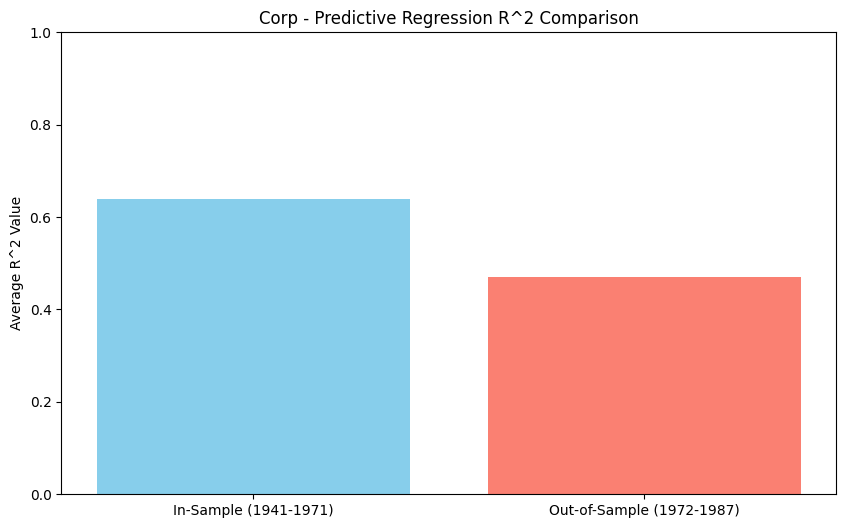

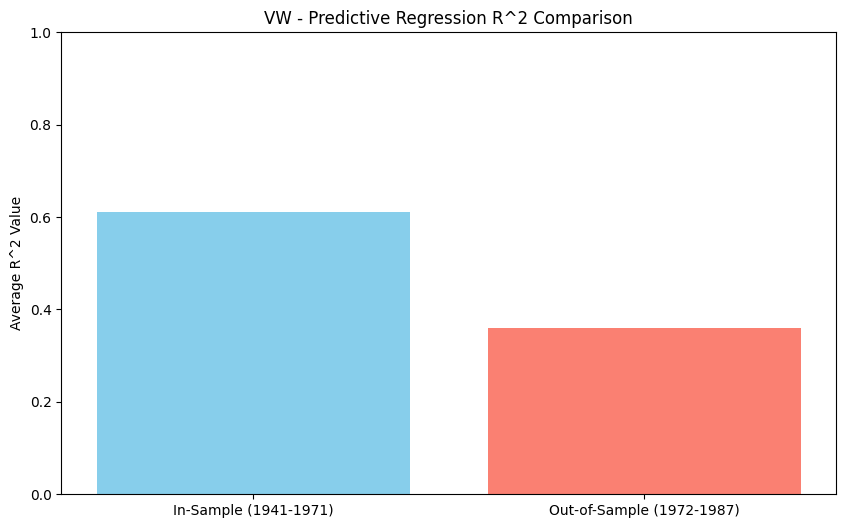

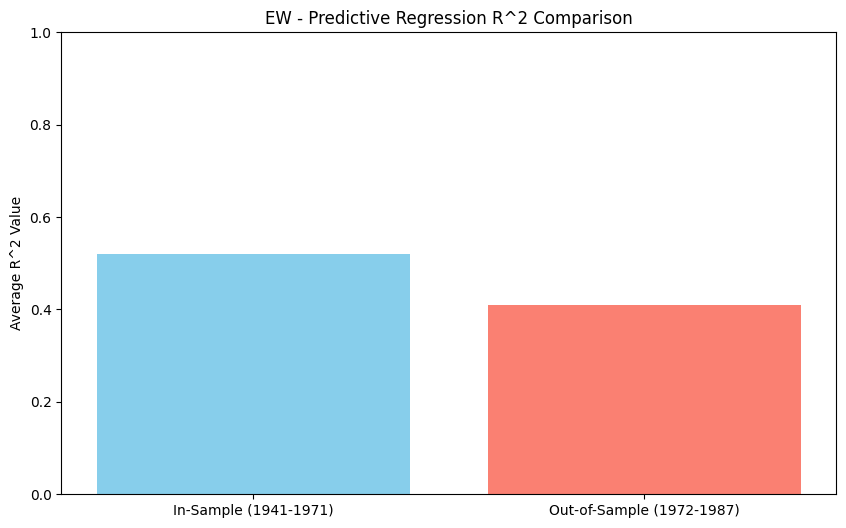

In [14]:
def plot_predictive_regression(X, assets, predictors, training_period, testing_period, periods):
    """
    Generate plots illustrating the in-sample and out-of-sample predictive regression R^2 values
    for each asset.

    Args:
        X (pd.DataFrame): DataFrame containing predictor variables.
        assets (dict): Dictionary with keys as asset names and values as pd.Series of asset returns.
        predictors (list): List of predictor column names to include in the regression.
        training_period (tuple): Start and end years for the training period.
        testing_period (tuple): Start and end years for the testing period.
        periods (dict): Dictionary specifying the periods for regression.
    """
    training_start, training_end = training_period
    testing_start, testing_end = testing_period

    for asset_name, Y in assets.items():
        Y_train = Y[training_start:training_end]
        Y_test = Y[testing_start:testing_end]
        X_train = X[training_start:training_end]
        X_test = X[testing_start:testing_end]

        # Running predictive regression for the training period
        train_results = predictive_regression(X_train, Y_train, predictors, periods)
        test_results = predictive_regression(X_test, Y_test, predictors, periods)

        # Assuming the focus is on annual ('Y') predictions for simplicity in visualization
        r2_train = train_results[train_results['Interval'] == 'Y']['R^2'].mean()
        r2_test = test_results[test_results['Interval'] == 'Y']['R^2'].mean()

        plt.figure(figsize=(10, 6))
        plt.bar(['In-Sample (1941-1971)', 'Out-of-Sample (1972-1987)'], [r2_train, r2_test], color=['skyblue', 'salmon'])
        plt.title(f'{asset_name} - Predictive Regression R^2 Comparison')
        plt.ylabel('Average R^2 Value')
        plt.ylim(0, 1)  # Assuming R^2 values are normalized
        plt.show()

# Define the training and testing periods
training_period = ('1941', '1971')
testing_period = ('1972', '1987')

# Execute the plotting function
plot_predictive_regression(X, assets, predictors, training_period, testing_period, periods)

<div class="custom-container">

## Fama-French Paper Result 7 (cont.)

The results above are quite close to the FF(1989). We can interpret that, for such a simple model, an R-squared of .3 or .4 is pretty good.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

# 4. TAA: Chen Predictive Model

In this section we first report the original results from Chen's analysis and then reproduce the results with updated data.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Chen's original analysis

Chen relates predictor variables to both the equity risk premium (ERP), as done by FF, but more importantly, he also relates the predictor variables to the **business cycle**. He finds that:
* The business cycle is related to the predictor variables and
* Predictor variables are related to the ERP (as found by both Chen and FF)
* Therefore, the business cycle and the ERP are related.

Regarding the business cycle, Chen hypothesizes:

At a business cycle trough (and vice-versa at a peak):

* Future GNP growth is expected to be high
* Short-term interest rates are low and the yield curve is steep

At a business cycle peak (and vice-versa at a trough):

* Past GNP growth has been high
* Stock and risky bond prices are high
* Recent industrial production has been high

Chen's empirical results confirm:

* Interest rates are forward-looking predictors of business activity and ERP
* Dividend yield (DP) and default spread (DEF) are price level proxies that reflect historical (previous) macroeconomic growth as well as high recent returns on stocks and risky bonds


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## An Overview of Risk Factors Used in the Chen Predictive Model

Quarterly data 1954-1986

### Predictor Variables

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div align="center">

| Predictor Variables | Description |
|---------------------|-------------|
| $YPL_{t-1}$       | Annual growth in industrial production |
| $UTS_{t-1}$       | 10 year Government bond yield - 30-day T-Bill yield |
| $TB_{t-1}$        | 30-day T-Bill yield |
| $URP_{t-1}$       | 10 year all-corp bond yield - 10 year Aaa bond yield |
| $DP_{t-1}$       | Dividend yield on NYSE stocks |

</div>

UTS follows the same definition as TERM in Fama French model; URP follows the same definition as DEF in Fama French model.

<div align="center">

|Macroeconomic variables | Decription|
|---------------------|-------------|
|$GNPG_{t}$              | $\log [G N P(t) / G N P(t-1)]$, or quarterly GNP growth|

</div>

Chen also includes real consumption per capita, which we will omit for now due to data unavailability. 

<div align="center">

|Market return variable | Description|
|---------------------|-------------|
|$EVW_{t}$              | Value-weighted NYSE stock portfolio - 30-day T-Bill yield|

</div>

<div class="custom-container">

### The predictivity of risk factors on $EVW_{t}$ is as follows:

**source: Chen 1991 Table 3 -lag1 (p536)**

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div align="center">

|State variable $(X)$ | b | t-stat | R-square|
|-----------------|---|-------------|--------|
|YPL            |-0.32|-2.75    |6%|
|URP            |5.58 |2.22     |3%|
|DP             |2.13 |2.86     |4%|
|UTS            |1.86 |2.85     |8%|
|TB             |-0.47|-2.14    |3%|

</div>

<div class="custom-container">

### Results on risk factors:

* DP, UTS and URP results are the same as prediction in Fama-French.
* **High** YPL implies **Low** equity risk premium: industrial production growth is the highest at business cycle peaks, when stock prices are unusually high implies investors expect a slower stock market growth rate in the future.
* **High** TB implies **Low** equity risk premium: short term interest rates are the highest at business cycle peaks, when stock prices are unusually high implies investors expect a slower stock market growth rate in the future.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

### Predictivity of risk factors on the growth rate of GNP is as follows:

$$GNPG_{t+lead} = a + b*X_{t-1} + e_{t}$$

###### source: Chen1991 Table 4 (p538)

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div align="center">

| Lead |    YPL     |    YPL       |    URP     |      URP     |    DP      |      DP     |    UTS     |     UTS      |    TB      |   TB        |
|------|------------|-----------|------------|-----------|------------|-----------|------------|-----------|------------|-----------|
|      |     b      |     t     |     b      |     t     |     b      |     t     |     b      |     t     |     b      |     t     |
| **-4** |   0.07    |   7.20    |   -1.05    |  -3.50    |   -0.19    |  -1.60    |   -0.08    |  -0.80    |   -0.01    |  -0.20    |
| **-3** |   0.11    |  14.30    |   -1.24    |  -3.70    |   -0.32    |  -2.60    |   -0.15    |  -2.00    |    0.00    |   0.10    |
| **-2** |   0.11    |  14.30    |   -1.51    |  -4.70    |   -0.43    |  -3.80    |    0.02    |   0.20    |   -0.03    |  -0.60    |
| **-1** |   0.09    |   7.40    |   -1.41    |  -4.30    |   -0.46    |  -4.00    |    0.03    |   0.40    |   -0.03    |  -0.80    |
|  **0** |   0.04    |   2.51    |   -1.25    |  -3.40    |   -0.44    |  -3.70    |    0.25    |   3.30    |   -0.08    |  -2.40    |
|  **1** |  -0.01    |  -0.40    |   -1.04    |  -2.40    |   -0.27    |  -2.40    |    0.32    |   4.90    |   -0.10    |  -3.00    |
|  **2** |  -0.02    |  -1.70    |   -0.09    |  -0.20    |   -0.06    |  -0.50    |    0.33    |   4.60    |   -0.10    |  -3.00    |
|  **3** |  -0.03    |  -2.10    |    0.09    |   0.20    |    0.01    |   0.10    |    0.27    |   3.00    |   -0.08    |  -2.10    |


</div>

<div class="custom-container">

**Results**:
* GNP growth precedes YPL(+), URP(-) and DP(-)
* GNP growth follows UTS(+) and TB(-)

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The results of Chen’s Tables III and IV can be summarized in a very simple hypothesis about the relationship between the business cycle (level of GNP) and the Equity Risk Premium (ERP):

**Hypothesis: When GNP hits a peak (high past GNPG and low expected future GNPG), then ERP hits a trough (i.e., GNP and ERP have opposite cycles).**

Table III tells us where the predictors are when ERP is low:

* High YPL
* Low URP
* Low DP
* Low UTS
* High TB

Table IV tells us where the predictors are when GNP peaks:

* High YPL (previous GNPG was high)
* Low URP (previous high GNPG raised junk bond prices)
* Low DP (previous high GNPG raised stock prices)
* Low UTS (UTS is low when expected future GNPG is low)
* High TB (TB is high when expected future GNPG is low)

Given the hypothesis, the levels of the predictor variables in Table III and IV are the same.

**Notice in Table IV**: YPL, URP and DP depend on previous GNPG, while UTS and TB depend upon expected future GNPG.

The argument can be repeated when GNP reaches a low level and ERP is high. Once again, the implications for the predictor variables in Table III will be consistent with the implications for the predictor variables from Table IV.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Next we use historical data to look at the predictivity of risk factors in Chen's model.


</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

## Updated Chen's analysis

In the rest of the note we use updated data to reproduce the results in Chen's model to the best we can, given data limitations. 

First we study the predictability of Chen's risk factors on market risk premium. We load risk factors and asset returns used in Chen's model.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [48]:
# Filtered data for the period 1954-1986
riskfactors.index = pd.to_datetime(riskfactors.index)
riskfactors_filtered = riskfactors.loc['1954-01-01':'1986-12-31']

# Calculate the continuously compounded quarterly excess value-weighted NYSE index return
riskfactors_filtered['quarterly_return'] = np.log(1 + riskfactors_filtered['vwretx'] - riskfactors_filtered['Rfree']).resample('Q').sum()*100

# Annualize 'def', 'term', 'tb30' and adjust for quarterly selection
riskfactors_filtered['def_annual'] = riskfactors_filtered['def'] 
riskfactors_filtered['term_annual'] = riskfactors_filtered['term'] 
riskfactors_filtered['tb30_annual'] = riskfactors_filtered['tb30'] * 12 * 100

# Prepare the DataFrame for regression 
df_reg = pd.DataFrame({
    'VW': riskfactors_filtered['quarterly_return'],
    'DP': riskfactors_filtered['dp'].resample('Q').last(),
    'UPR': riskfactors_filtered['def_annual'].resample('Q').last(),
    'UTS': riskfactors_filtered['term_annual'].resample('Q').last(),
    'TB': riskfactors_filtered['tb30_annual'].resample('Q').last(),
    'YPL': riskfactors_filtered['ypl'].resample('Q').last() * 100
}).dropna()

# Function to run regression for a given lag
def run_lagged_regression(df, dependent_var, independent_vars, lag):
    results = []
    for var in independent_vars:
        X = df[var].shift(lag)  # Shift for lag
        y = df[dependent_var]
        X = sm.add_constant(X.dropna())  # Drop NaNs that were created by shifting
        y = y.loc[X.index]  # Align y with X after dropping NaNs
        model = sm.OLS(y, X).fit()
        results.append((model.params[1].round(2), model.tvalues[1].round(2), model.rsquared.round(2)))
    return results

# Variables to loop over
independent_vars = ['DP', 'UPR', 'UTS', 'TB', 'YPL']
lags = [1, 2, 3, 4] # We show only the first 4 lags in the interest of space

# Collecting results
all_results = {var: [] for var in independent_vars}
for lag in lags:
    lag_results = run_lagged_regression(df_reg, 'VW', independent_vars, lag)
    for i, var in enumerate(independent_vars):
        all_results[var].append(lag_results[i])

# Formatting the output
formatted_results = []
for var in independent_vars:
    for i, (coef, t_val, r_squared) in enumerate(all_results[var]):
        formatted_results.append({
            'Lag': i + 1,
            'Variable': var,
            'Value': f"{coef} ({t_val}) {r_squared}"
        })

# Display results
df_display = pd.DataFrame(formatted_results)
pivot_table = df_display.pivot(index='Lag', columns='Variable', values='Value')

print(pivot_table.to_markdown())

|   Lag | DP               | TB                | UPR              | UTS              | YPL                |
|------:|:-----------------|:------------------|:-----------------|:-----------------|:-------------------|
|     1 | 1.47 (1.97) 0.03 | -0.03 (-2.0) 0.03 | 6.63 (4.05) 0.11 | 1.64 (3.64) 0.09 | -0.35 (-3.51) 0.09 |
|     2 | 2.45 (3.37) 0.08 | -0.01 (-0.69) 0.0 | 5.55 (3.34) 0.08 | 0.85 (1.82) 0.03 | -0.34 (-3.39) 0.08 |
|     3 | 2.64 (3.65) 0.09 | -0.0 (-0.1) 0.0   | 2.61 (1.51) 0.02 | 0.69 (1.44) 0.02 | -0.31 (-3.07) 0.07 |
|     4 | 2.0 (2.72) 0.06  | 0.0 (0.14) 0.0    | 1.5 (0.87) 0.01  | 0.49 (1.03) 0.01 | -0.15 (-1.44) 0.02 |


<div class="custom-container">

The regression results indicate that:
Market risk premium is negatively correlated with YPL and TB, but is positively correlated with UTS. That is:

When ERP is low (Table III in Chen's model), the model predicts:
* High YPL （-）
* Low UPR  （+）
* Low DP   （+）
* Low UTS  （+）
* High TB  （-）

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

Next we study the predictability of Chen's risk factors on the growth rate of GNP.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

The following cell replicates Table IV from Chen (1991).

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

In [53]:
# Filtered data for the period 1954-1985Q4
riskfactors.index = pd.to_datetime(riskfactors.index)
riskfactors_filtered = riskfactors.loc['1954-01-01':'1985-12-31']

# Annualize 'tb30' for consistent comparison
riskfactors_filtered['def_annual'] = riskfactors_filtered['def']
riskfactors_filtered['term_annual'] = riskfactors_filtered['term']
riskfactors_filtered['tb30_annual'] = riskfactors_filtered['tb30'] * 12 * 100

# Prepare the DataFrame for regression 
df_reg = pd.DataFrame({
    'REALGNPG': riskfactors_filtered['realgnpg'].resample('Q').last()*100, 
    'DP': riskfactors_filtered['dp'].resample('Q').last(),
    'UPR': riskfactors_filtered['def_annual'].resample('Q').last(),
    'UTS': riskfactors_filtered['term_annual'].resample('Q').last(),
    'TB': riskfactors_filtered['tb30_annual'].resample('Q').last(),
    'YPL': riskfactors_filtered['ypl'].resample('Q').last() * 100
}).dropna()

# Adjusting function to accommodate leads instead of lags
def run_lead_regression(df, dependent_var, independent_vars, lead):
    """
    Runs regressions with specified leads for the dependent variable, keeping
    predictors lagged by one period.
    """
    results = []
    # Adjust the data for lead; positive lead means future data
    y = df[dependent_var].shift(-lead)  # This shifts up for leads
    for var in independent_vars:
        X = df[var].shift(1)  # Predictor lagged by one period
        valid_index = y.notna() & X.notna()
        X = X[valid_index]
        y_valid = y[valid_index]
        X = sm.add_constant(X)  # Add constant term for regression
        model = sm.OLS(y_valid, X).fit()
        coef = model.params[1].round(4)
        t_val = model.tvalues[1].round(2)
        r_squared = model.rsquared.round(2)
        results.append(f"{coef} ({t_val}) {r_squared}")
    return results

# Running the regression across different leads
leads = range(-4, 5)  # From -4 to 4
independent_vars = ['DP', 'UPR', 'UTS', 'TB', 'YPL']  
results = {lead: run_lead_regression(df_reg, 'REALGNPG', independent_vars, lead) for lead in leads}

# Formatting and displaying results
df_results = pd.DataFrame(results, index=independent_vars).T
print(df_results.to_markdown())

|    | DP                   | UPR                  | UTS                  | TB                   | YPL                  |
|---:|:---------------------|:---------------------|:---------------------|:---------------------|:---------------------|
| -4 | -0.3937 (-1.25) 0.01 | -3.2827 (-4.93) 0.17 | -0.5849 (-3.11) 0.07 | -0.0031 (-0.45) 0.0  | 0.1441 (3.41) 0.09   |
| -3 | -0.7338 (-2.39) 0.04 | -3.9397 (-6.28) 0.24 | -0.5314 (-2.81) 0.06 | -0.0038 (-0.55) 0.0  | 0.2836 (8.08) 0.35   |
| -2 | -1.1134 (-3.78) 0.1  | -4.2742 (-7.12) 0.29 | -0.3956 (-2.08) 0.03 | -0.006 (-0.88) 0.01  | 0.3935 (16.53) 0.69  |
| -1 | -1.417 (-5.09) 0.17  | -4.3558 (-7.5) 0.31  | -0.2479 (-1.29) 0.01 | -0.0079 (-1.18) 0.01 | 0.4292 (24.99) 0.83  |
|  0 | -1.5833 (-5.94) 0.22 | -3.4418 (-5.57) 0.2  | 0.069 (0.36) 0.0     | -0.0149 (-2.27) 0.04 | 0.3289 (11.23) 0.5   |
|  1 | -1.4688 (-5.49) 0.2  | -1.8288 (-2.76) 0.06 | 0.5251 (2.85) 0.06   | -0.0236 (-3.78) 0.1  | 0.1757 (4.64) 0.15   |
|  2 | -1.077 (-3.84) 0.

<div class="custom-container">

Results show that:

* GNP growth precedes YPL(+), URP(-)
* GNP growth follows UTS(+) and TB(-)

These regression results substantiate the following prediction results in Chen's table IV:
* High YPL (previous GNPG was high) (corr(laggnpg,YPL) >0)
* Low URP (previous high GNPG raised junk bond prices) (corr(laggnpg,URP) < 0)
* Low DP (previous high GNPG raised stock prices) (corr(laggnpg,DP) < 0)
* Low UTS (UTS is low when expected future GNPG is low) (corr(leadgnpg,UPS) > 0)
* High TB (TB is high when expected future GNPG is low) (corr(leadgnpg,TB) <0)

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>

<div class="custom-container">

# 5. TAA: Contrarian TAA Versus Momentum TAA

To the degree that past returns tell us about future returns, an investor can be one of two types: a momentum investor or a contrarian investor.

A contrarian looks for reversals (investors who believe in negative correlation): invest after the index has fallen (because the index will rise from there) and get out after the index has risen (because the index will fall from there). 

A momentum investor looks for continuations (investors who believe in positive correlation): invest after the market has started to go up because it will continue to go up and get out when the market has started to go down because it will continue go down. 

But, there is no evidence of positive/negative serial correlation at any time interval, like a month, a quarter or a year; and, any longer.

**Two General Precautions:**

First, the profitability of either type of TAA depends upon the timing of the decisions, and that is part of science and part of art! TAA is HARD to do!

Second, note that the above discussion is related to the behavior of the stock index. There is ample empirical evidence of positive serial correlation at short time intervals for individual stocks. So, at the stock level, momentum investing could be quite profitable (even narrowly defined as just a function of previous stock price moves, so ignoring things like earnings momentum and other such metrics).

To summarize, the Chen's predictive model shows:

The business cycle (seen as GNPG) is related to the predictor variables:
* High DP and high URP indicate previous GNPG was low (near an economic trough)
* High TB and low UTS predict low GNPG in the near future
So, DP and URP and price level proxies that look backward at GNP growth
while TB and UTS, the interest rate variables, predict future GNP growth.

Chen replicates the Fama-French results that the predictor variables relate to the ERP (equity risk premium):
* High DP, URP and UTS signal that the current ERP (equity risk premium) is high
* High TB predicts that the current ERP is low.

</div>

<style>
.custom-container {
    padding: 15px;
    border: 1px solid #2196f3;
    margin: auto;
    max-width: 1500px;
    margin-bottom: 20px;
    border-radius: 4px;
    color: #000000;
    background-color: #e1f5fe;
}
</style>
